In [4]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.externals import joblib

In [5]:
# Read data using pandas
data=pd.read_csv("Diabetes.csv")

In [6]:
data.head()

,Pregnancy,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabeteFun,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
data.shape

(768, 9)

In [8]:
data.describe()

,Pregnancy,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabeteFun,Age,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
# class distribution of target 
print(data.groupby('Class').size())

Class
0    500
1    268
dtype: int64


Data Visualization - Univariate Plots

In [10]:
# Given that the input variables are numeric, we can create box plots of each to view the distribution 

NameError: name 'plt' is not defined

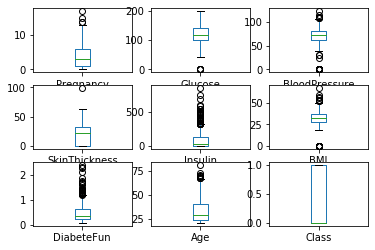

In [11]:
data.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.show()

NameError: name 'plt' is not defined

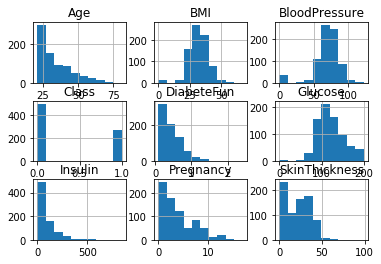

In [13]:
# plotting histogram to get more clear idea about data distribution
data.hist()
plt.show()

Data Visualization - Multivariate Plots

NameError: name 'plt' is not defined

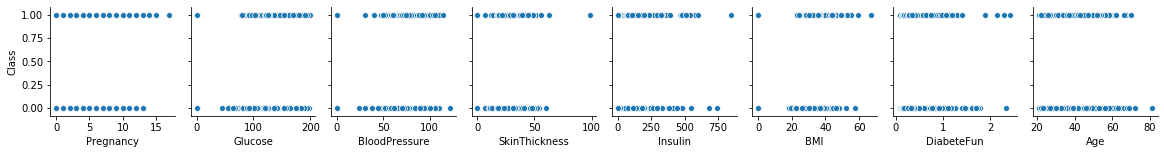

In [14]:
# Create scatter plot 
sns.pairplot(data, x_vars=['Pregnancy','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabeteFun','Age'], y_vars='Class', size=2, aspect=1, kind='scatter')
plt.show()

In [15]:
# prepare x & y using pandas
# define X and y
import pandas as pd
data=pd.read_csv("Diabetes.csv")
feature_cols = ['Pregnancy', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabeteFun', 'Age']

# X is a matrix, hence we use [] to access the features we want in feature_cols
X = data[feature_cols]

# y is a vector, hence we use dot to access 'label'
y = data.Class

In [16]:
# check the type and shape of X
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(768, 8)


In [17]:
# check the type and shape of y
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(768,)


In [18]:
# Splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [19]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression

# instantiate model
logreg = LogisticRegression()

# fit model
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
# make class predictions for the testing set
y_pred_class = logreg.predict(X_test)

In [21]:
# Classification accuracy: percentage of correct predictions
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

0.7760416666666666


classification accuracy is 77%

In [22]:
# Checking for null accuracy
# examine the class distribution of the testing set (using a Pandas Series method)
y_test.value_counts()

0    123
1     69
Name: Class, dtype: int64

In [23]:
# calculate the percentage of ones
# because y_test only contains ones and zeros, we can simply calculate the mean = percentage of ones
y_test.mean()

0.359375

In [24]:
# calculate the percentage of zeros
1 - y_test.mean()

0.640625

In [25]:
# calculate null accuracy in a single line of code
# only for binary classification problems coded as 0/1
max(y_test.mean(), 1 - y_test.mean())

#This means that a dumb model that always predicts 0 would be right 68% of the time
#This shows how classification accuracy is not that good as it's close to a dumb model
#It's a good way to know the minimum we should achieve with our models

0.640625

In [26]:
# Confusion Matrix

# IMPORTANT: first argument is true values, second argument is predicted values
# this produces a 2x2 numpy array (matrix)
print(metrics.confusion_matrix(y_test, y_pred_class))

[[109  14]
 [ 29  40]]


In [27]:
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[109  14]
 [ 29  40]]


In [28]:
# use float to perform true division, not integer division
# calculate classfication accuracy as below 
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred_class))

0.7760416666666666
0.7760416666666666


In [29]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
print(1 - metrics.accuracy_score(y_test, y_pred_class))

0.22395833333333334
0.22395833333333337


In [32]:
sensitivity = TP / float(FN + TP)

print(sensitivity)
print(metrics.recall_score(y_test, y_pred_class))

0.5797101449275363
0.5797101449275363


In [31]:
specificity = TN / (TN + FP)

print(specificity)

0.8861788617886179


In [34]:
# print the first 10 predicted probabilities for class 1
logreg.predict_proba(X_test)[0:10, 1]

array([0.42177412, 0.32330154, 0.15013466, 0.04893891, 0.2095608 ,
       0.28115175, 0.37451324, 0.10278252, 0.15863691, 0.20918594])

In [35]:
# store the predicted probabilities for class 1
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt

# adjust the font size 
plt.rcParams['font.size'] = 12

Text(0, 0.5, 'Frequency')

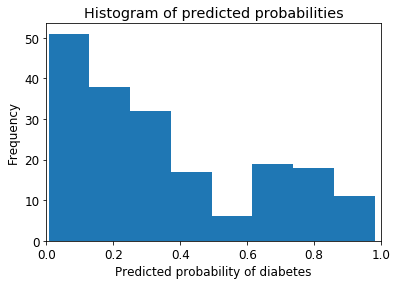

In [37]:
# histogram of predicted probabilities

# 8 bins
plt.hist(y_pred_prob, bins=8)

# x-axis limit from 0 to 1
plt.xlim(0,1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of diabetes')
plt.ylabel('Frequency')

We can see from the this histogram that;
about 50% of observations have probability from 0.0 to 0.1 .
Small number of observations with probability > 0.5.
This is below the threshold of 0.5.
Most would be predicted "no diabetes" in this case.

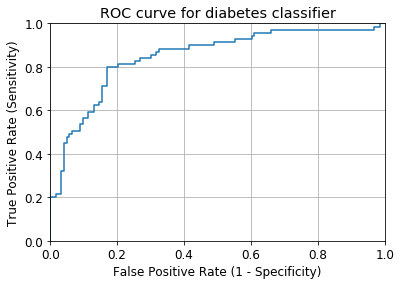

In [42]:
# AUC & ROC applicable where o/p expectde to be 1,0.

from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

tpr=sensitivity
fpr=specificity

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

ROC curve helps you to choose a threshold that balances sensitivity and specificity in a way that makes sense for particular context
As ne cant see thresholds used to generate on curve

In [45]:
# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])    
evaluate_threshold(0.5)    

Sensitivity: 0.5652173913043478
Specificity: 0.8861788617886179


In [46]:
evaluate_threshold(0.3)

Sensitivity: 0.8260869565217391
Specificity: 0.7317073170731707


# AUC- percentage of the ROC plot that is under the curve

In [47]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
print(metrics.roc_auc_score(y_test, y_pred_prob))

0.8467067279368446


In [49]:
# calculate cross-validated AUC
from sklearn.model_selection import cross_val_score
cross_val_score(logreg, X, y, cv=10, scoring='roc_auc').mean()

0.8285897435897436

AUC shows higher predicted probability measn positive result.

In [56]:
import seaborn as sb
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# From sklearn matrics import accuracy_score,confusion_matrix,classification_reports

# Cross validation Libraries
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

import warnings

warnings.filterwarnings('ignore')

In [55]:
# scoring parameters for classification
# scoring =[accuracy,f1,f1_micro,f1_macro,roc_auc]
# scoring parameters for regression
# scoring =[r2,neg_mean_squared_error,explained_variance]

sv=SVC()
score=cross_val_score(sv,X,y,cv=5,scoring='accuracy')
print('accuracy score=',score)
print ('mean scores',score.mean)
print('std',score.std())
y_pred = cross_val_predict(sv,X,y,cv=5)

print('Y prediction values')
print(y_pred)

conf_mat = confusion_matrix(y,y_pred)
conf_mat


from sklearn.metrics import accuracy_score
accuracy_score(y,y_pred)

accuracy score= [0.74675325 0.73376623 0.77272727 0.79084967 0.75163399]
mean scores <built-in method mean of numpy.ndarray object at 0x00000207771A6530>
std 0.020217403744815586
Y prediction values
[1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0
 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1
 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0
 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 1 0 0 0 0 1 1
 0 1 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1
 1 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1
 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0
 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 

0.7591145833333334

In [62]:
# Decision Tree Classifier (criterion='gini')
# Decision Tree Classifier (criterion='entropy')
# gini and entropy

dtc=DecisionTreeClassifier(criterion='gini')
score=cross_val_score(dtc,X,y,cv=5,scoring='f1_macro')

print('f1_score:',score)
print('mean score:',score.mean())
print('stn deviation:',score.std())

y_pred = cross_val_predict(dtc, X, y, cv=5)

print('Y prediction values')
print(y_pred)

conf_mat = confusion_matrix(y, y_pred)
conf_mat

f1_score: [0.63679245 0.66067337 0.69513575 0.73869126 0.68475275]
mean score: 0.6832091144364478
stn deviation: 0.03430819830825407
Y prediction values
[1 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 1 0 1 0 0 1 0 0 1 0 1
 1 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1
 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1
 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 1 1 0 1 0 0 1
 1 1 1 1 0 0 1 1 1 0 1 0 0 1 0 1 0 0 0 0 0 1 1 0 1 0 1 1 0 1 0 0 1 0 1 1 1
 0 1 0 1 0 1 1 1 0 1 0 1 0 0 1 1 1 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 0 1 1 0 1
 1 1 1 0 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 1 0
 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 1 0 1 1
 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 0 1
 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 0 1 1 0 0 1 0 0
 0 0 1 0 0 1 0 1 1 0 1

array([[397, 103],
       [116, 152]], dtype=int64)

In [61]:
# k=10
knn=KNeighborsClassifier()

score=cross_val_score(knn,X,y,cv=10,scoring='accuracy')

print('accuracy score:',score)
print('mean score:',score.mean())
print('stn deviation:',score.std())

y_pred = cross_val_predict(knn, X, y, cv=5)

print('Y prediction values')
print(y_pred)

print("y_pred.shape",y_pred.shape)

conf_mat = confusion_matrix(y, y_pred)
conf_mat

accuracy score: [0.67532468 0.79220779 0.71428571 0.67532468 0.66233766 0.74025974
 0.7012987  0.79220779 0.71052632 0.75      ]
mean score: 0.7213773069036227
stn deviation: 0.04416817250533367
Y prediction values
[0 0 1 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 0 0 1 0 0
 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1
 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0
 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 0 0 0 1 1 1
 0 1 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 1
 1 1 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 0 1
 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 

array([[414,  86],
       [126, 142]], dtype=int64)

In [80]:
svrbf=SVC(kernel='rbf') 
score=cross_val_score(svrbf,X,y,cv=5)
print('accuracy score:',score)
print('mean score:',score.mean())
print('stn deviation:',score.std())
y_pred = cross_val_predict(svrbf, X, y, cv=5)
print('Y prediction values')
print(y_pred)
conf_mat = confusion_matrix(y, y_pred)
print(conf_mat)

accuracy score: [0.74675325 0.73376623 0.77272727 0.79084967 0.75163399]
mean score: 0.7591460826754943
stn deviation: 0.020217403744815586
Y prediction values
[1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0
 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1
 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0
 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 1 0 0 0 0 1 1
 0 1 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1
 1 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1
 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0
 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0
 0 1 1 0 0 0 0 

In [79]:
from sklearn.externals import joblib 
from sklearn.neighbors import KNeighborsClassifier

joblib_file = "joblib_knn.pkl"             # Save to file in the current working directory
joblib.dump(knn, joblib_file)
joblib_knn = joblib.load(joblib_file)      # Load from file

score=cross_val_predict(knn_from_joblib,X,y,cv=5)
print(score)

[0 0 1 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 0 0 1 0 0
 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1
 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0
 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 0 0 0 1 1 1
 0 1 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 1
 1 1 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 0 1
 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 1 1 0
 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1
 1 0 0 1 1 1 1 0 1 0 0 0 

In [ ]:
Conclusion - 
Out of all the above Cross Validation model,Support Vector Machines (SVM) has the largest estimated accuracy score at about 79 % ; mean score: 0.7591460826754943 & least 
stn deviation: 0.020217403744815586.